### Implementing HDBSCAN to cluster spending habits of accounts

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import HDBSCAN, DBSCAN
import seaborn as sns

In [43]:
spending_data = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/Normalised_proportional_spending_by_account.csv')
spending_data.head()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-0.823946,1.469060,-0.659479,-0.461756,-0.599109,2.363629,0.330532,-0.335033,0.547045,-0.395954,-0.655493,-0.593556,5.031022,-1.163425
1,1002.0,0.206617,2.090178,-0.695943,-0.214125,-0.708981,-0.202244,0.443402,-0.335033,3.472580,0.104802,-0.627263,-0.839066,-0.384490,-0.761329
2,1006.0,-0.141294,-0.598923,0.642122,1.045971,-0.745641,1.381723,-0.817788,-0.335033,0.901520,-0.395954,2.001449,-0.756300,-0.384490,-1.177781
3,1018.0,-0.435344,-1.410646,-0.611389,-0.639188,2.068229,-1.209232,0.391902,-0.335033,-0.652950,-0.395954,1.555709,2.145807,-0.099624,-0.763351
4,1053.0,0.785170,-0.434381,-0.695943,-0.552537,2.356540,-0.107351,1.214833,-0.053129,1.080736,-0.395954,-0.592384,0.945316,-0.384490,-0.998671


Splitting the data into features and targets

In [44]:
X = spending_data.drop('Sender account', axis=1, errors='ignore')

#### Performing dimensionality reduction (UMAP, PCA, t-SNE)

C:\Users\camer\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(8142, 2)


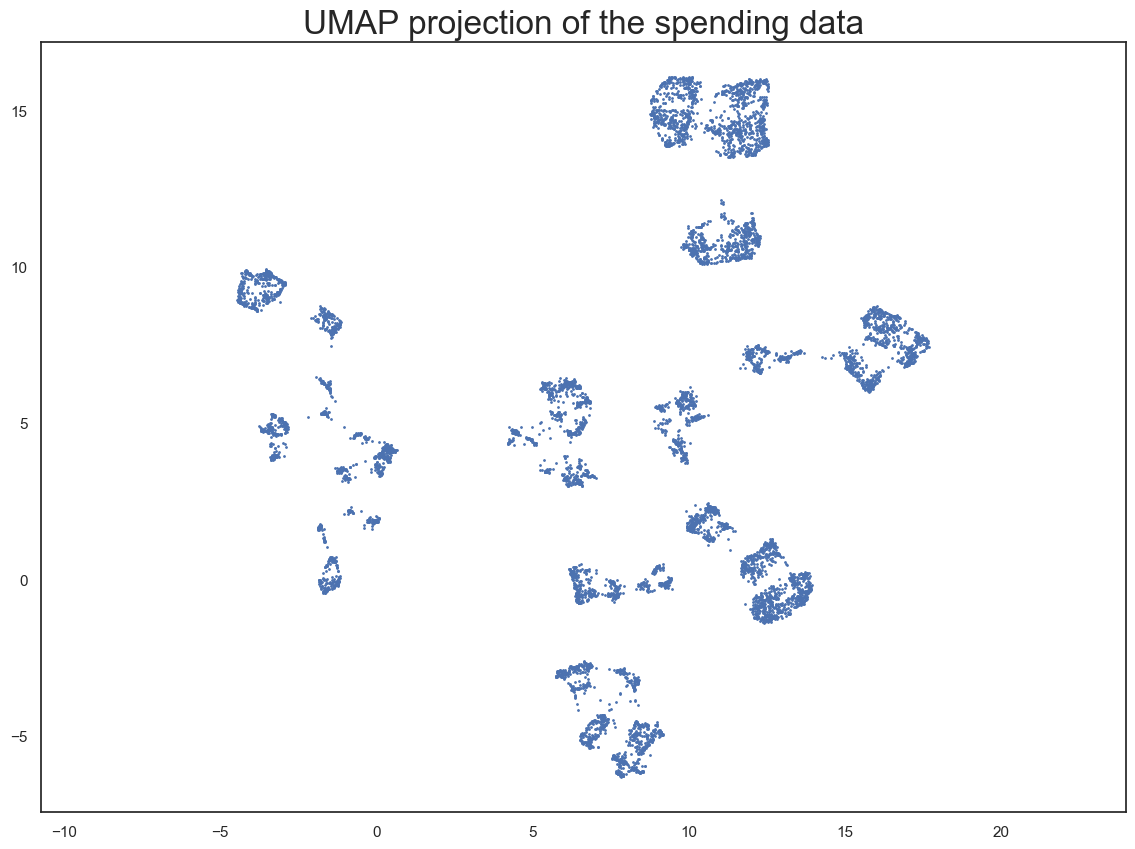

In [83]:
import umap
import matplotlib.pyplot as plt
sns.set(style='white', rc={'figure.figsize':(14,10)})

umap_model = umap.UMAP(random_state=3)

spending_umap = umap_model.fit_transform(X)
print(spending_umap.shape)

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
        s=1,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the spending data', fontsize=24);

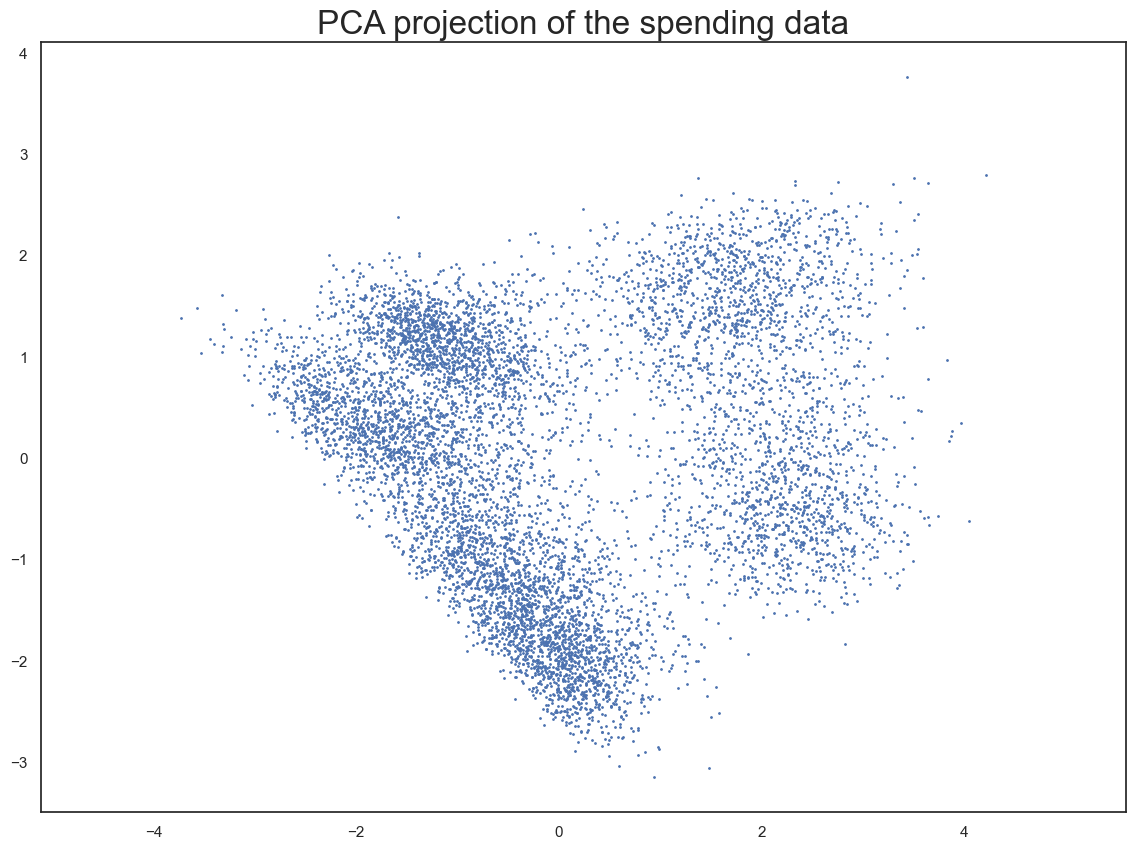

In [81]:
from sklearn.decomposition import PCA
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})
pca = PCA()
spending_pca = pca.fit_transform(X)

plt.scatter(
    spending_pca[:, 0],
    spending_pca[:, 1],
        s=1,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection of the spending data', fontsize=24);

C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


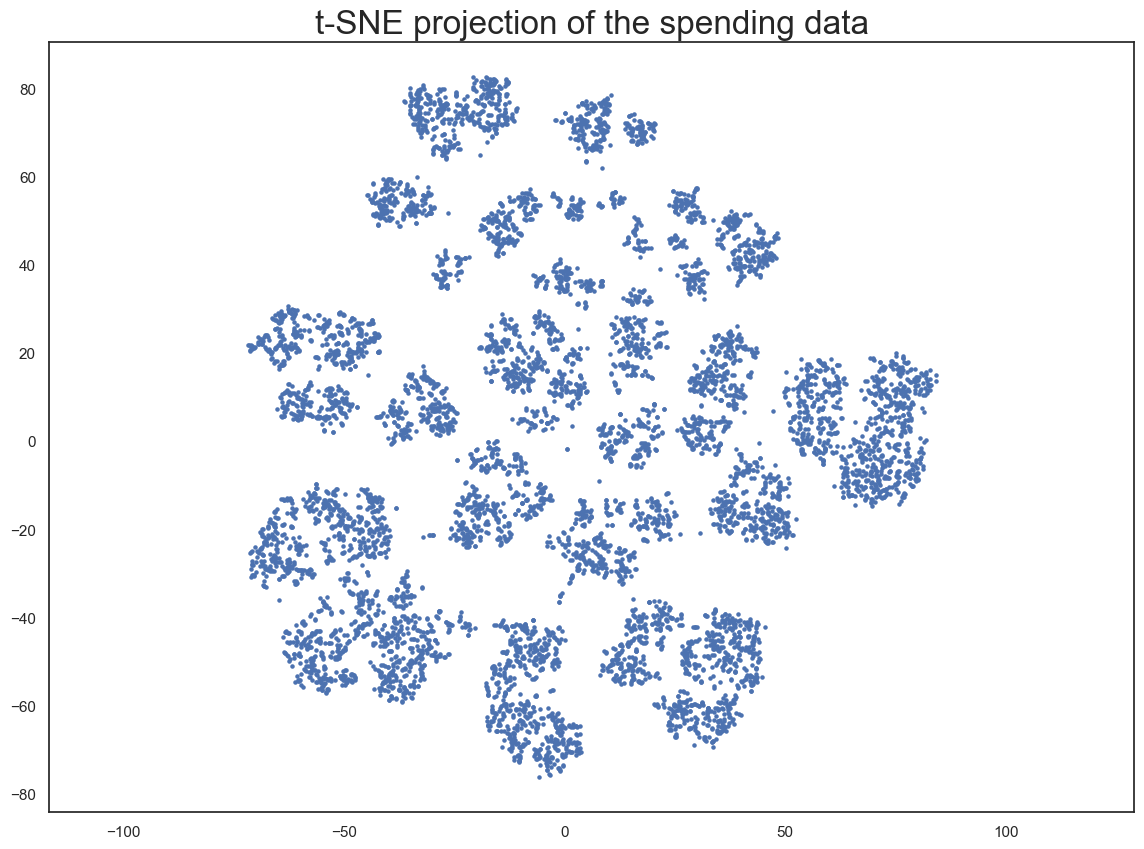

In [6]:
from sklearn.manifold import TSNE

tsne = TSNE()
spending_tsne = tsne.fit_transform(X)

plt.scatter(
    spending_tsne[:, 0],
    spending_tsne[:, 1],
    s=5,
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('t-SNE projection of the spending data', fontsize=24)
plt.show()

#### Clustering with HDBSCAN on data after UMAP 

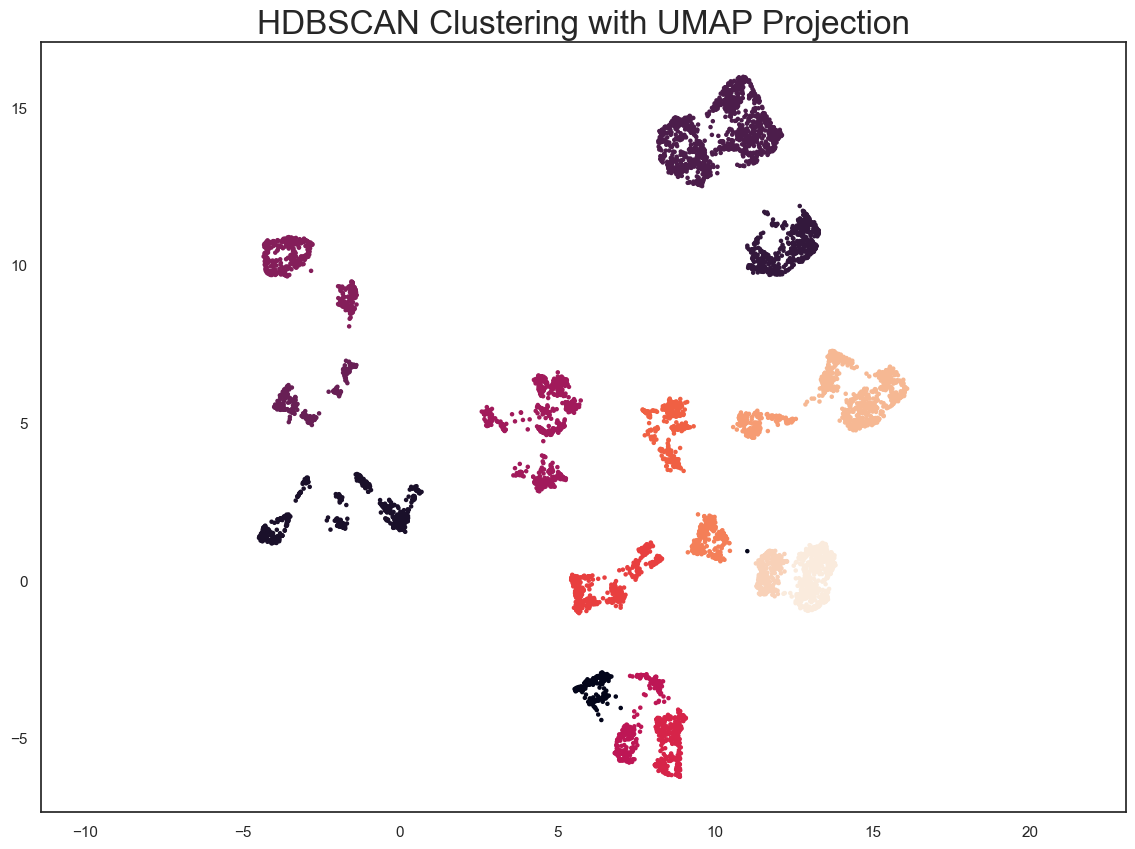

The average silhouette_score is : 0.58797675


In [54]:
from sklearn.metrics import silhouette_score
sns.set(style='white', rc={'figure.figsize':(14,10)})
hdb = HDBSCAN(min_samples=1, min_cluster_size=250)

cluster_labels = hdb.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()

spending_data['cluster_label'].value_counts()

silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

### Implementing DBSCAN

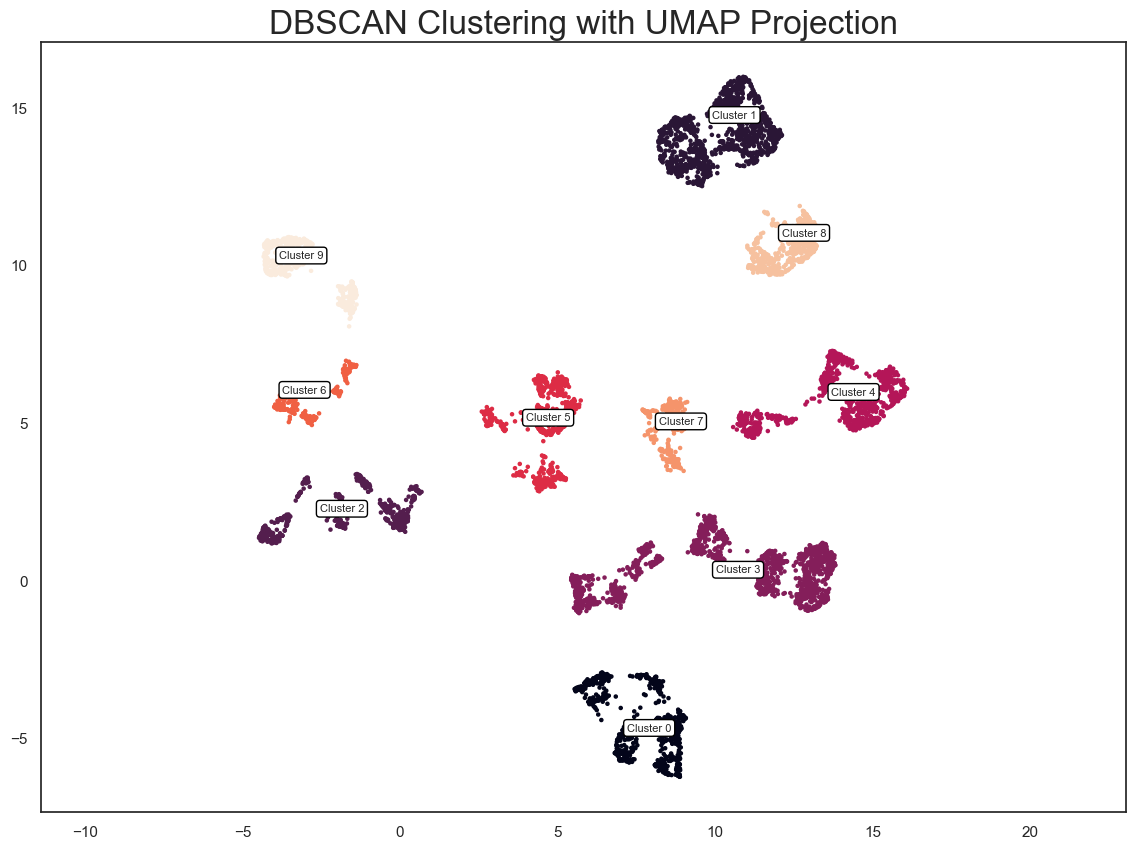

The average silhouette_score is : 0.54581493


In [66]:
from sklearn.metrics import silhouette_score
sns.set(style='white', rc={'figure.figsize':(14,10)})
db = DBSCAN(min_samples=1, eps=1)

cluster_labels = db.fit_predict(spending_umap)

spending_data['cluster_label'] = cluster_labels

plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,
)

for label in np.unique(cluster_labels):
    if label == -1:
        continue
    cluster_center = np.mean(spending_umap[cluster_labels == label], axis=0)
    plt.annotate(
        f'Cluster {label}',
        xy=cluster_center,
        xytext=(cluster_center[0], cluster_center[1]),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('DBSCAN Clustering with UMAP Projection', fontsize=24)
plt.show()
spending_data['cluster_label'].value_counts()


silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

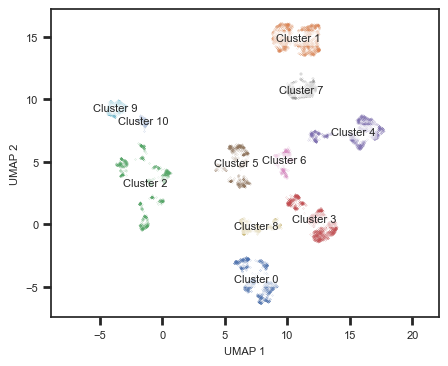

cluster_label
1     1250
3     1175
4     1036
2     1016
0      899
5      767
7      574
8      517
9      385
6      342
10     181
Name: count, dtype: int64
The average silhouette score is: 0.5818886


In [189]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np
sns.set(style='ticks', rc={'figure.figsize':(6,4)})

db = DBSCAN(min_samples=1, eps=1)

cluster_labels = db.fit_predict(spending_umap)
spending_data['cluster_label'] = cluster_labels

plt.figure(figsize=(5, 4))
for label in np.unique(cluster_labels):
    if label == -1:
        continue
    cluster_points = spending_umap[cluster_labels == label]
    cluster_center = np.mean(cluster_points, axis=0)
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        s=0.01,
    )

    plt.text(
        cluster_center[0],  
        cluster_center[1], 
        f'Cluster {label}', 
        fontsize=8, 
        ha='center', 
        va='center', 
        bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.6, edgecolor='none')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.tick_params(axis='both', direction='out', length=6, width=2, labelsize=8)
plt.xlabel('UMAP 1', fontsize=8)
plt.ylabel('UMAP 2', fontsize=8)
plt.savefig("UMAP with DBSCAN.png")
plt.show()

print(spending_data['cluster_label'].value_counts())

silhouette_avg = silhouette_score(spending_umap, cluster_labels)
print("The average silhouette score is:", silhouette_avg)


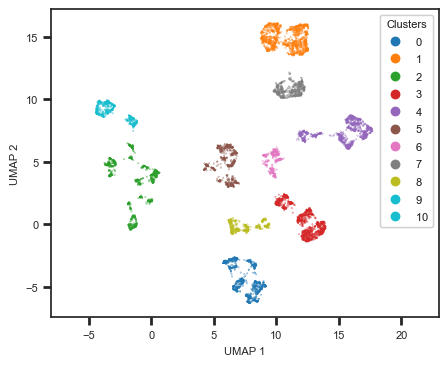

cluster_label
1     1250
3     1175
4     1036
2     1016
0      899
5      767
7      574
8      517
9      385
6      342
10     181
Name: count, dtype: int64
The average silhouette score is: 0.5818886


In [190]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(spending_umap)

plt.figure(figsize=(5, 4))
scatter = plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    c=cluster_labels,
    cmap='tab10',
    s=0.05,
    label=f'Cluster {label}',
)

plt.gca().set_aspect('equal', 'datalim')
plt.xlabel('UMAP 1', fontsize=8)
plt.ylabel('UMAP 2', fontsize=8)
plt.xlim(-10,25)
plt.tick_params(axis='both', direction='out', length=6, width=2, labelsize=8)
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters", fontsize=8, loc='upper right')
plt.gca().add_artist(legend1)
legend1.get_title().set_fontsize('8')
plt.savefig("UMAP_with_DBSCAN.png", dpi=300, bbox_inches='tight')
plt.show()

print(spending_data['cluster_label'].value_counts())

silhouette_avg = silhouette_score(spending_umap, cluster_labels)
print("The average silhouette score is:", silhouette_avg)

In [216]:
spending_data.to_csv('Transactional_data_categorical_labels.csv')

#### Plotting accounts within UMAP clusters

In [11]:
cluster_of_interest = 3

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=6)

sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
Sender account,,,,,,,,,,,,,,,
50706.0,-1.042051,-1.493164,-0.603126,-0.689027,1.408028,0.887325,-0.801777,-0.335033,0.184279,-0.395954,-0.624003,0.852732,-0.384490,0.878061,3
63614.0,-1.042051,-1.155270,1.531711,-0.731424,0.987899,-0.409457,0.413507,-0.335033,0.051374,0.143935,-0.590392,1.737134,-0.384490,0.276024,3
4018.0,0.505484,-0.977281,-0.576770,-0.691133,0.477857,-0.939549,2.084024,-0.335033,0.439620,-0.049079,-0.636674,0.645922,-0.384490,0.640861,3
41830.0,-0.585400,-0.170775,-0.584607,-0.731424,1.106875,-0.529701,-0.602991,0.339040,1.770324,-0.395954,-0.521274,1.815830,-0.384490,-0.037232,3
94420.0,-0.018176,-1.264555,1.047224,0.928464,1.382801,-1.204376,-1.675156,-0.335033,-1.099538,-0.395954,-0.195747,0.633773,-0.384490,0.934149,3
14850.0,-0.548955,0.255872,-0.592862,-0.731424,2.206770,-0.513249,-0.476447,0.612187,0.110027,-0.156759,-0.485156,2.621718,-0.291881,-0.997777,3


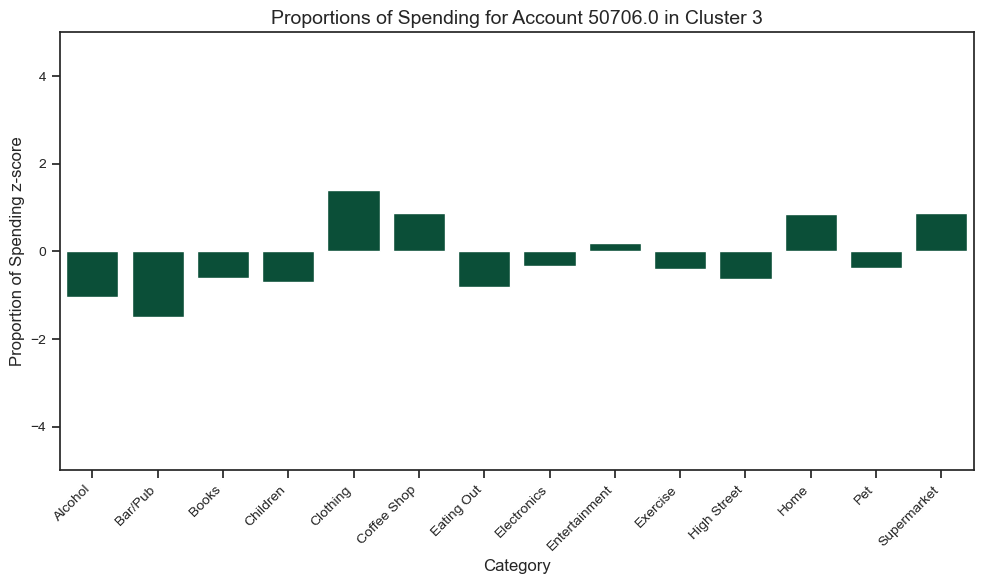

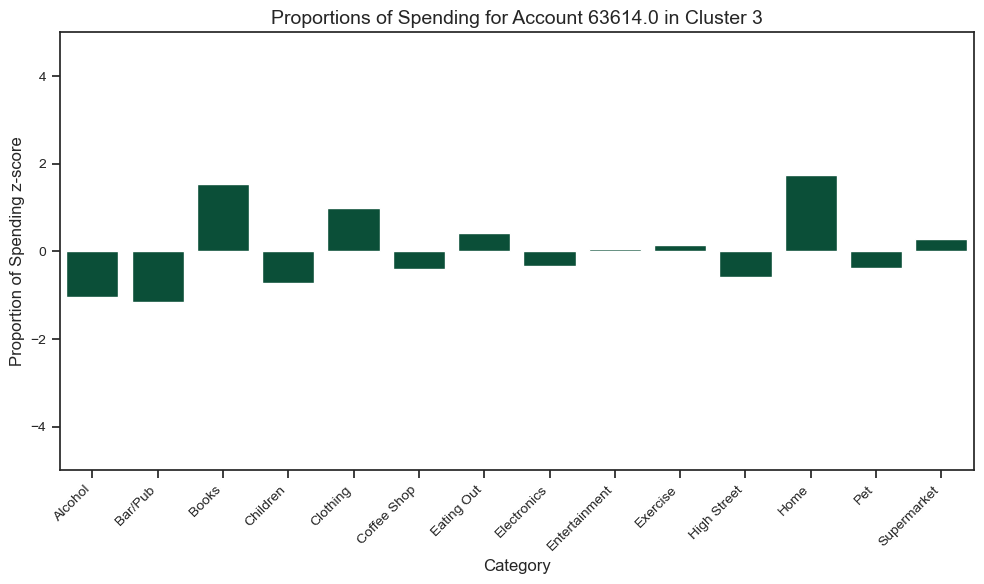

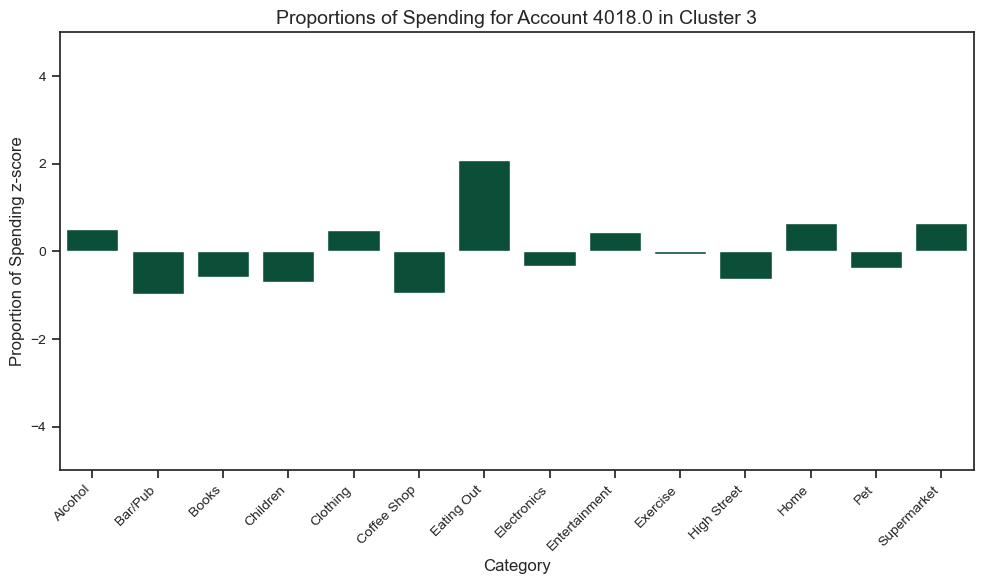

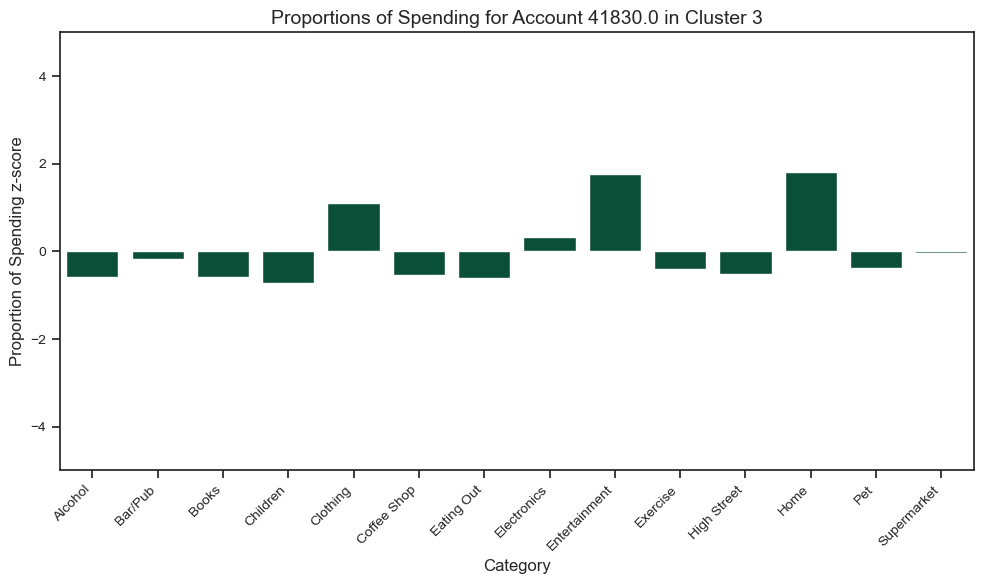

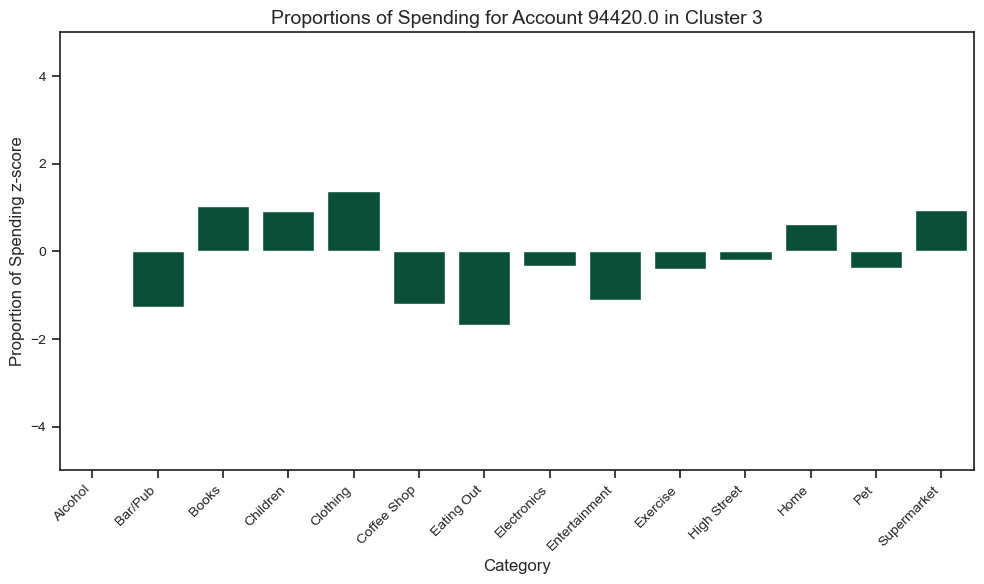

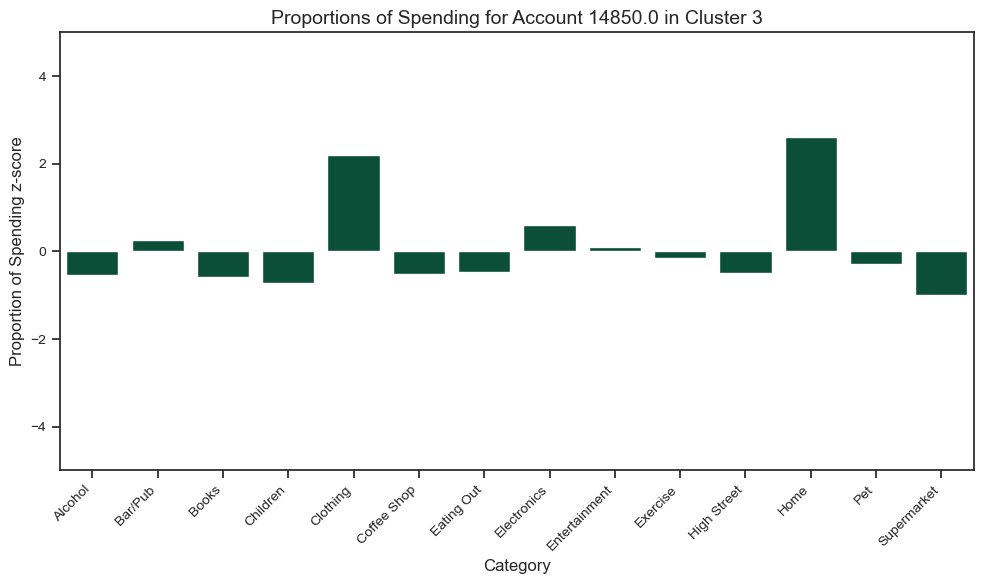

In [12]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending z-score', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-5, 5)
    plt.tight_layout()
    plt.show()

Labelling clusters with insights

In [13]:
cluster_names = [
    'High Coffee Low Clothing Low High-Street',
    'High Bar/Pub',
    'Low Supermarket High Highstreet High Children',
    'Low Supermarket High Highstreet',
    'High Clothing High Home',
    'High Children',
    'High Clothing High Coffeeshop',
    'Low Supermarket High Highstreet High Bar/Pub',
    'High Clothing High Children Low Bar/Pub',
    'Low Supermarket High Highstreet High Coffeshop',
    'High Children High Coffeeshop',
    'Low Supermarket High Highstreet High Coffeshop High Clothing'
]

In [14]:
spending_data['cluster_name'] = spending_data['cluster_label'].apply(lambda x: cluster_names[x])

In [15]:
spending_data.describe()

,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,cluster_label
count,8142.000000,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8.142000e+03,8142.000000
mean,50826.578605,-2.242809e-16,-4.996140e-17,2.247172e-17,8.508710e-17,-1.876280e-17,-2.138086e-16,3.534387e-17,8.377807e-17,2.011546e-16,9.250495e-17,-3.752559e-17,2.443527e-17,-5.236129e-18,1.448662e-16,3.802628
std,28946.392695,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00,2.734266
min,1000.000000,-1.042051e+00,-2.896347e+00,-6.959426e-01,-7.314238e-01,-8.144134e-01,-1.284410e+00,-2.286177e+00,-3.350334e-01,-1.177129e+00,-3.959542e-01,-6.554928e-01,-8.390661e-01,-3.844903e-01,-1.561700e+00,0.000000
25%,25450.250000,-7.879016e-01,-7.267744e-01,-6.650930e-01,-6.957986e-01,-7.618667e-01,-5.900837e-01,-7.386377e-01,-3.350334e-01,-9.246153e-01,-3.959542e-01,-6.098106e-01,-8.390661e-01,-3.844903e-01,-8.997708e-01,1.000000
50%,50860.500000,-2.588866e-01,-1.087238e-01,-5.934202e-01,-5.729304e-01,-5.249840e-01,-3.159922e-01,-1.915174e-01,-3.350334e-01,-5.878521e-02,-3.959542e-01,-5.529379e-01,-4.937834e-01,-3.844903e-01,-3.185652e-01,3.000000
75%,75606.750000,5.079061e-01,5.966526e-01,7.663635e-01,9.181048e-01,8.444169e-01,2.713502e-01,5.648121e-01,-3.350334e-01,5.897094e-01,-1.677861e-01,-9.079269e-02,6.893745e-01,-2.156672e-01,8.708178e-01,6.000000
max,100988.000000,7.023502e+00,4.031982e+00,4.642094e+00,4.011184e+00,4.002967e+00,4.072837e+00,4.720008e+00,1.027473e+01,4.233562e+00,6.611754e+00,4.160499e+00,5.659606e+00,8.486626e+00,2.852160e+00,10.000000


### Visualising the distribution of z-scores in categories within each cluster

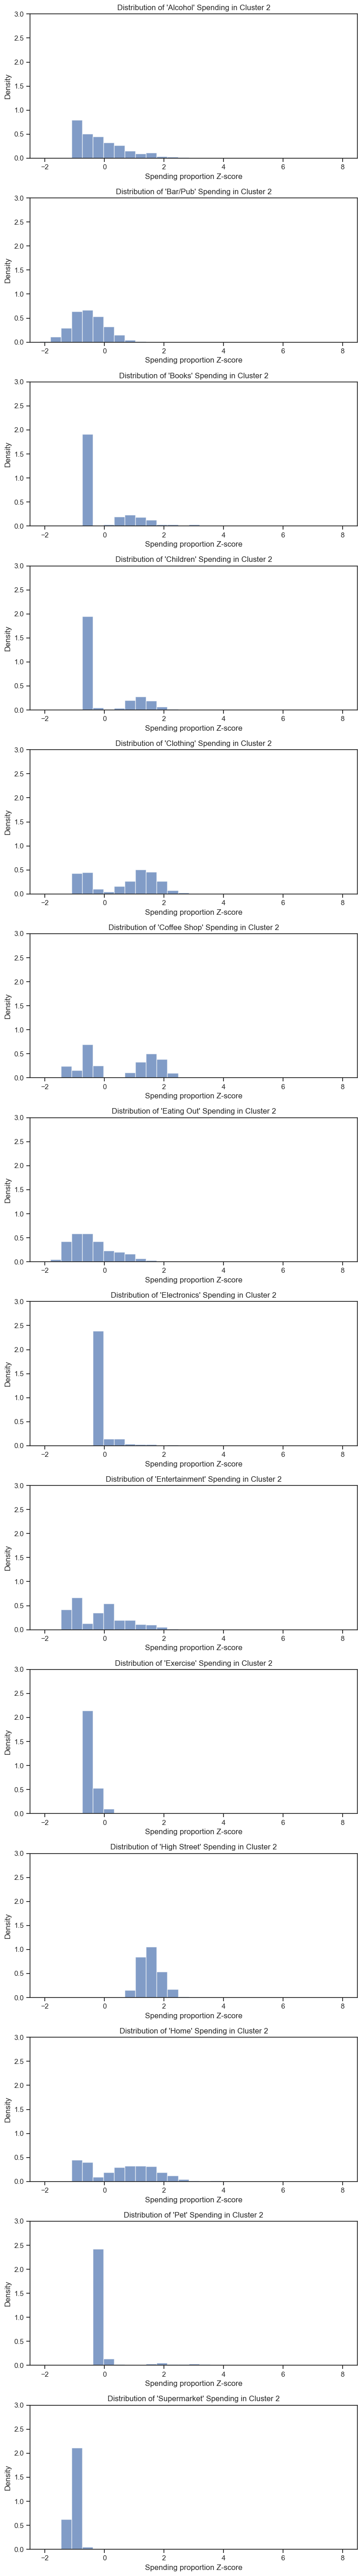

In [129]:
cluster = 2

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns

fig, axs = plt.subplots(len(categories), 1, figsize=(8, len(categories)*4))

min_value = cluster_data[categories].min().min()
max_value = cluster_data[categories].max().max()

num_bins = 20

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7)
    axs[i].set_title(f"Distribution of '{category}' Spending in Cluster {cluster}")
    axs[i].set_xlabel('Spending proportion Z-score')
    axs[i].set_ylabel('Density')
    axs[i].set_xlim(-2.5, 8.5)
    axs[i].set_ylim(0, 3)
plt.tight_layout()
plt.show()

Plotting specific categories for report

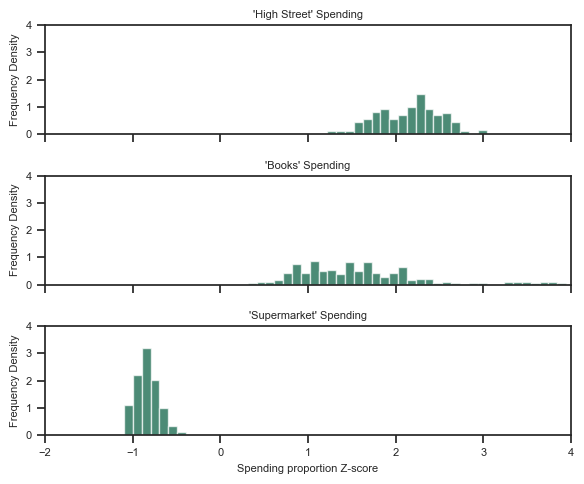

In [229]:
cluster = 10

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

chosen_categories = ['High Street', 'Books', 'Supermarket']


fig, axs = plt.subplots(len(chosen_categories), 1, figsize=(6, 5))

min_value = cluster_data[chosen_categories].min().min()
max_value = cluster_data[chosen_categories].max().max()

num_bins = 50

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(chosen_categories):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7, color='#005a3c')
    axs[i].set_title(f"'{category}' Spending", fontsize=8, loc='center', pad=5)
    axs[i].set_ylabel('Frequency Density', fontsize=8)
    axs[i].tick_params(axis='y', labelsize=8)
    axs[i].set_xlim(-2, 4)
    axs[i].set_ylim(0, 4)

axs[0].tick_params(axis='x', labelbottom= False)
axs[1].tick_params(axis='x', labelbottom= False)
axs[2].set_xlabel('Spending proportion Z-score', fontsize=8)
axs[2].tick_params(labelsize=8)
plt.subplots_adjust(top=1)
plt.savefig("Spending_in_cluster_10.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

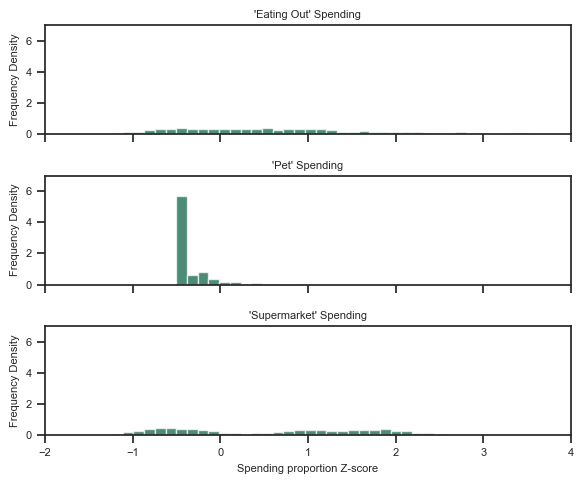

In [232]:
cluster = 1

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

chosen_categories = ['Eating Out', 'Pet', 'Supermarket']


fig, axs = plt.subplots(len(chosen_categories), 1, figsize=(6, 5))

min_value = cluster_data[chosen_categories].min().min()
max_value = cluster_data[chosen_categories].max().max()

num_bins = 50

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(chosen_categories):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7, color='#005a3c')
    axs[i].set_title(f"'{category}' Spending", fontsize=8, loc='center', pad=5)
    axs[i].set_ylabel('Frequency Density', fontsize=8)
    axs[i].tick_params(axis='y', labelsize=8)
    axs[i].set_xlim(-2, 4)
    axs[i].set_ylim(0, 7)

axs[0].tick_params(axis='x', labelbottom= False)
axs[1].tick_params(axis='x', labelbottom= False)
axs[2].set_xlabel('Spending proportion Z-score', fontsize=8)
axs[2].tick_params(labelsize=8)
plt.subplots_adjust(top=1)
plt.savefig("Spending_in_cluster_1.png", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

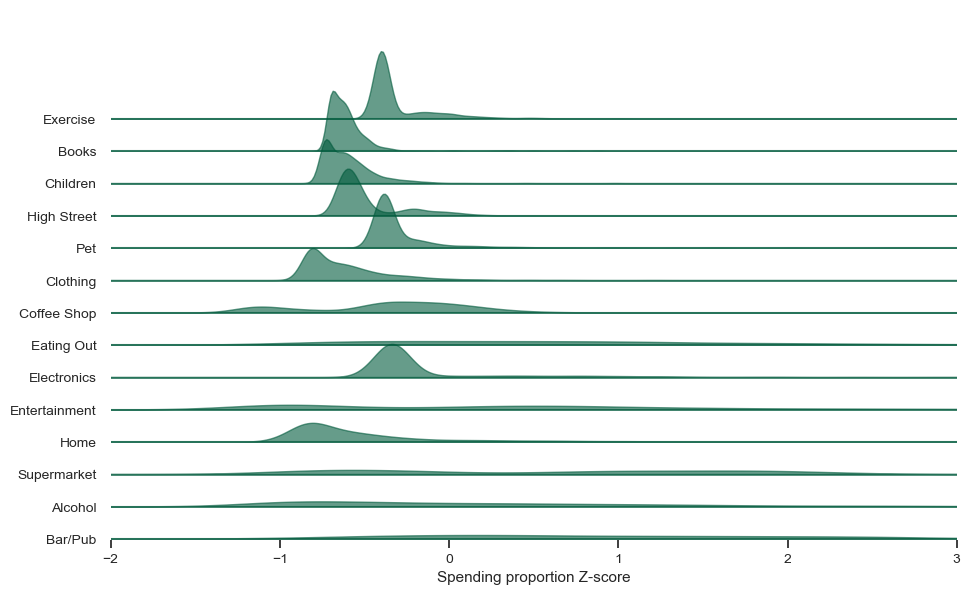

In [219]:
import joypy

cluster =1
cluster_data = spending_data[spending_data['cluster_label'] == cluster]
categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns
categories = ['Exercise', 'Books', 'Children',  'High Street', 'Pet', 'Clothing', 'Coffee Shop',
       'Eating Out', 'Electronics', 'Entertainment',
       'Home', 'Supermarket', 'Alcohol', 'Bar/Pub']

fig, axes = joypy.joyplot(cluster_data[categories], figsize=(10, 6), alpha=0.6, linecolor = "none", color='#005a3c')
for ax in axes:
    ax.set_ylim(-0.1, 10)
    ax.set_xlim(-2,3)
    ax.set_xticks(range(-2,4))
    ax.tick_params(axis='both', labelsize=10)
plt.xlabel('Spending proportion Z-score', fontsize=11)
plt.savefig("Cluster 1 spending distributions.png")
plt.show()

In [ ]:
cluster = 2

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns

plt.figure(figsize=(12, 8))
plt.boxplot([cluster_data[category] for category in categories], labels=categories, vert=False)
plt.title(f'Boxplot of Spending in Cluster {cluster}', fontsize=16)
plt.xlabel('Spending proportion Z-score', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
cluster = 10

cluster_data = spending_data[spending_data['cluster_label'] == cluster]

category_means = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).mean()

plt.figure(figsize=(8, 6))
category_means.plot(kind='barh')
plt.title(f'Mean Spending in Cluster {cluster}', fontsize=16)
plt.xlabel('Mean Spending proportion Z-score', fontsize=14)
plt.ylabel('Categories', fontsize=14)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [131]:
categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns


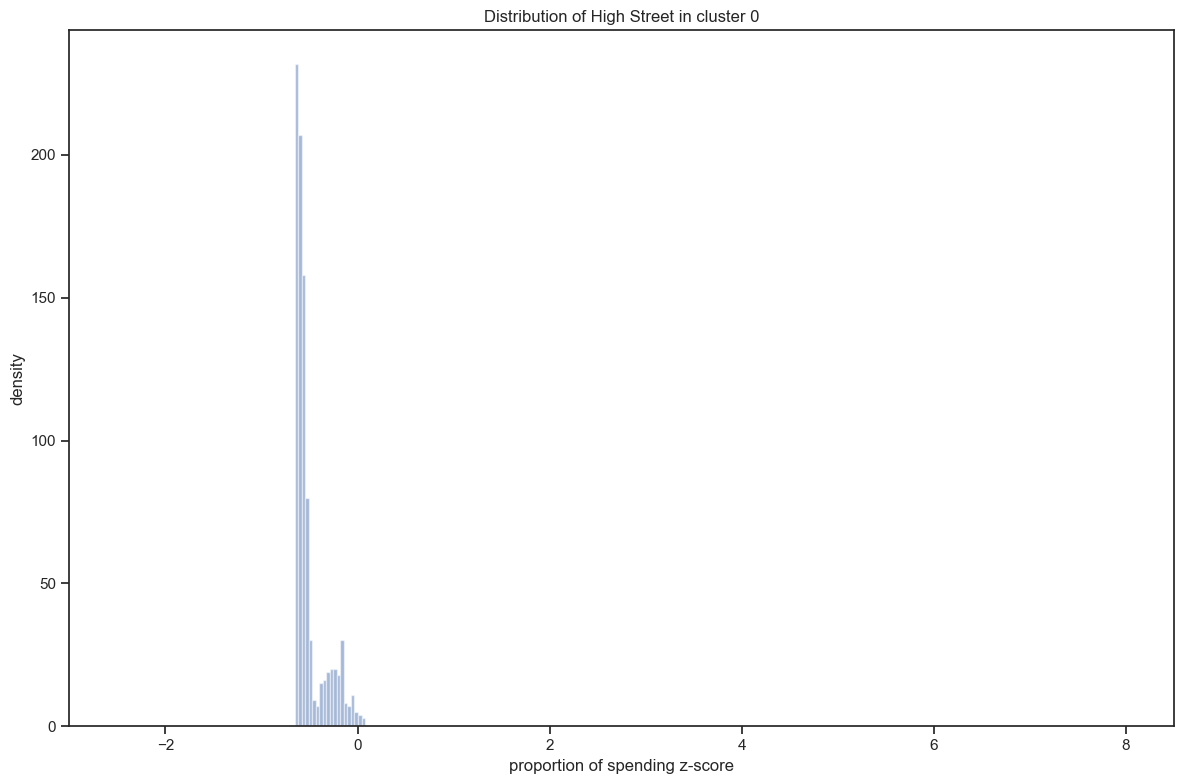

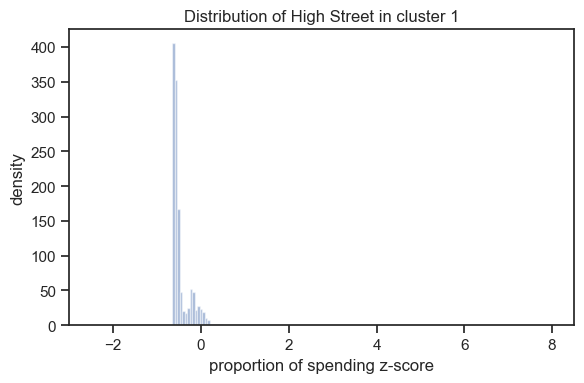

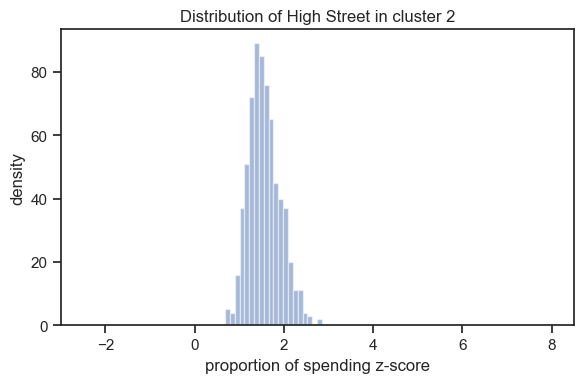

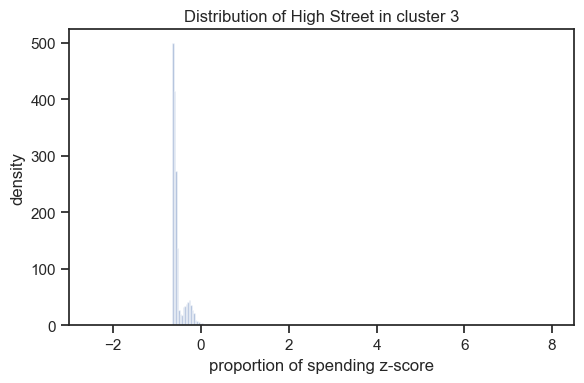

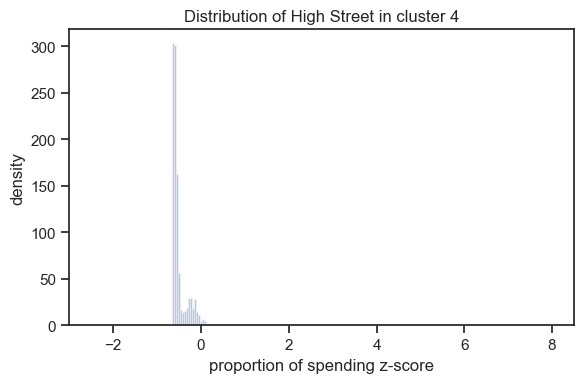

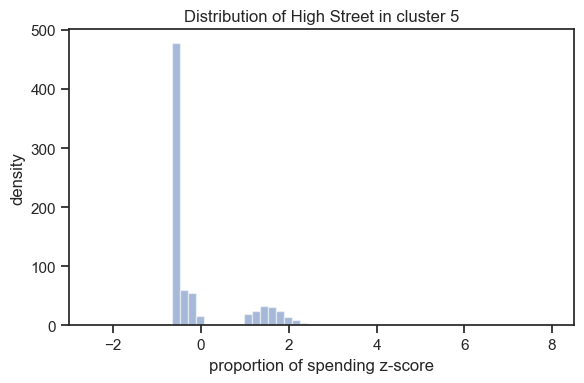

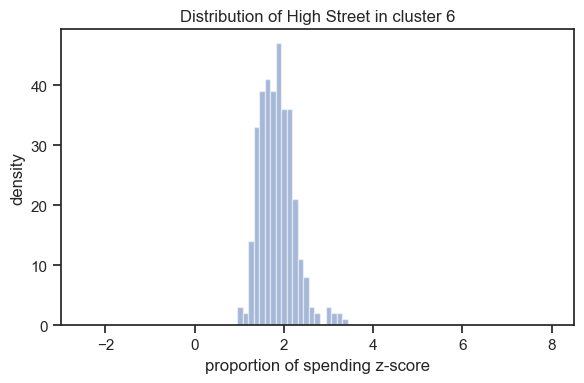

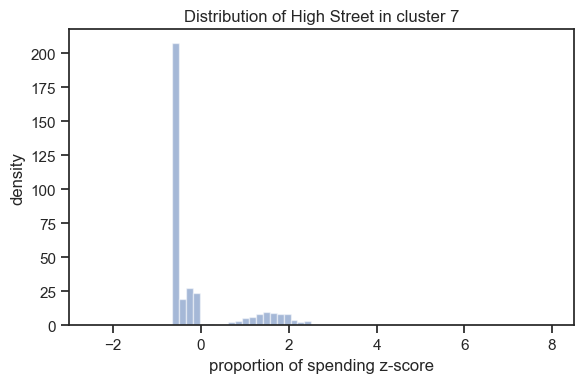

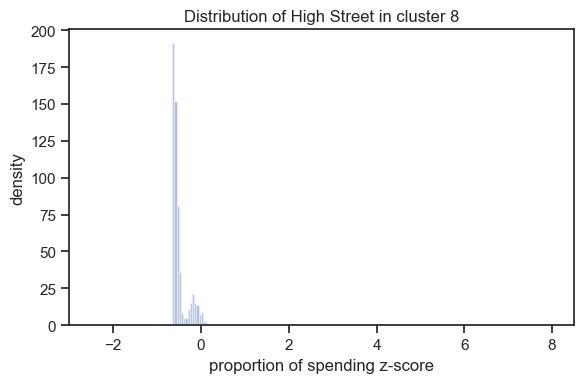

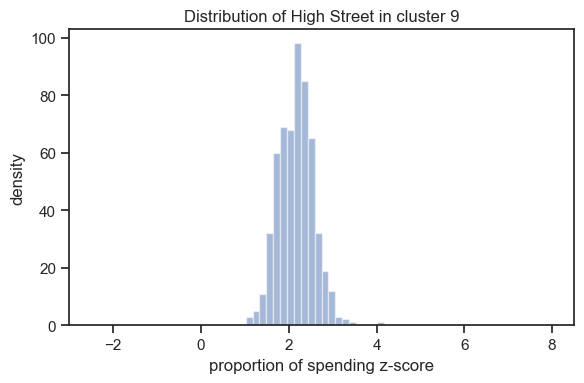

In [132]:
category = 'High Street'

category_by_cluster = spending_data.groupby('cluster_label')[category]

# Plot the distribution of the desired category across all clusters
plt.figure(figsize=(12, 8))
for cluster_label, data in category_by_cluster:
    plt.hist(data, bins=20, alpha=0.5, label=f'Cluster {cluster_label}')
    plt.title(f'Distribution of {category} in cluster {cluster_label}')
    plt.xlabel('proportion of spending z-score')
    plt.ylabel('density')
    plt.xticks(rotation=0)
    plt.xlim(-3,8.5)
    plt.tight_layout()
    plt.show()
    


#### Convert back to orginal proportions using the mena and std from 'sorting_data_into_spending_sectors.csv'

Less informative as you need to be able to see the orginal distribution to determine if the clustering has identified highere than average spenders etc.

In [ ]:
mean_values = pd.read_csv('spending_prop_mean_values.csv', header=None, index_col=0)
mean_values = pd.Series(mean_values[1])
std_values = pd.read_csv('spending_prop_std_values.csv', header=None, index_col=0)
std_values = pd.Series(std_values[1])

# Use the mean and standard deviation values to inverse transform the Z-score normalized data
proportion_data = (spending_data.drop('cluster_label', axis=1) * std_values) + mean_values

# Create a new DataFrame with the original data and the original column headingsb
proportion_data = pd.DataFrame(proportion_data, columns=spending_data.drop('cluster_label', axis=1).columns)
proportion_data['cluster_label'] = spending_data['cluster_label']

In [ ]:
proportion_data

In [ ]:
cluster = 8

cluster_data = proportion_data[proportion_data['cluster_label'] == cluster]

categories = cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns

fig, axs = plt.subplots(len(categories), 1, figsize=(8, len(categories)*4))

min_value = cluster_data[categories].min().min()
max_value = cluster_data[categories].max().max()

num_bins = 20

bin_edges = np.linspace(min_value, max_value, num_bins+1)

for i, category in enumerate(cluster_data.drop(['Sender account', 'cluster_label'], axis=1).columns):

    axs[i].hist(cluster_data[category], bins=bin_edges, density=True, alpha=0.7)
    axs[i].set_title(f'Distribution of {category} in Cluster {cluster}')
    axs[i].set_xlabel('Spending proportion')
    axs[i].set_ylabel('Frequency')
    axs[i].set_xlim(0, 0.5)
    axs[i].set_ylim(0, 300)
plt.tight_layout()
plt.show()

In [ ]:
cluster_data

In [ ]:
categories

In [ ]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-0.2, 0.2)
    plt.tight_layout()
    plt.show()

In [ ]:
spending_data['Alcohol'].min()

In [ ]:
spending_data['cluster_label'].value_counts()

#### Clustering without UMAP

In [ ]:
db = DBSCAN(min_samples=10, eps=1)

cluster_labels = db.fit_predict(X)

spending_data['cluster_label'] = cluster_labels

In [ ]:
spending_data['cluster_label'].unique()

In [ ]:
plt.scatter(
    spending_umap[:, 0],
    spending_umap[:, 1],
    s=5,
    c=cluster_labels,  # Assign colors based on cluster labels using the colormap
)

for label in np.unique(cluster_labels):
    if label == -1:  # Label noise points separately
        continue
    cluster_center = np.mean(spending_umap[cluster_labels == label], axis=0)
    plt.annotate(
        f'Cluster {label}',
        xy=cluster_center,
        xytext=(cluster_center[0], cluster_center[1]),
        textcoords="offset points",
        ha='center',
        va='center',
        fontsize=8,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
    )

plt.gca().set_aspect('equal', 'datalim')
plt.title('HDBSCAN Clustering Before UMAP Projection', fontsize=24)
plt.show()
spending_data['cluster_label'].value_counts()


silhouette_avg = silhouette_score(spending_umap, cluster_labels)

print("The average silhouette_score is :", silhouette_avg)

Plotting the proportions for some of the accounts in a cluster

In [ ]:
cluster_of_interest = 1

accounts_in_cluster = spending_data[spending_data['cluster_label'] == cluster_of_interest]
sample_accounts = accounts_in_cluster.sample(n=3)


In [ ]:
sample_accounts.set_index('Sender account', inplace=True)
sample_accounts

In [ ]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(8, 4))
    plt.bar(account_data.index[:-1], account_data.values[:-1], color='skyblue')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}')
    plt.xlabel('Category')
    plt.ylabel('Proportion of Spending')
    plt.xticks(rotation=45)
    plt.ylim(-5, 5)
    plt.tight_layout()
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
for account_name, account_data in sample_accounts.iterrows():
    plt.figure(figsize=(10, 4))
    ax = sns.barplot(x=account_data.index[:-1], y=account_data.values[:-1], color='#005a3c')
    plt.title(f'Proportions of Spending for Account {account_name} in Cluster {cluster_of_interest}', fontsize=14)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Proportion of Spending', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.ylim(-0.2, 0.2)  # Adjust y-axis limits if needed
    plt.tight_layout()
    plt.show()

In [ ]:
spending_data['cluster_label'].value_counts()